<a href="https://colab.research.google.com/github/gouravgujariya/machine-learning-project/blob/main/customer_segmentation_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IBM ASSIGNMENT ON UNSUPERVISED LEARNING

The grading will center around 5 main points:

Does the report include a section describing the data?

Does the report include a paragraph detailing the main objective(s) of this analysis?  

Does the report include a section with variations of Unsupervised Learning models and specifies which one is the model that best suits the main objective(s) of this analysis?

Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?

Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different modeling techniques? 

#Data describing
this dataset is taken from kaggle .<br>
It is used here to segment the customers on the basis of different features such as:<list><br>
1. ID	:id is different for every one and use to identify individual
2. Gender:gender of customer
3. Ever_Married:marital status of the customer
4.	Age:age of the customer
5.	Graduated	:graduation status of the customer
6. Profession:profession in which customer is working
7.	Work_Experience:working experience of the customer
8.	Spending_Score:spending score of the customer
9.	Family_Size:family size of the customer
10.	Var_1:variable (external),Cat_6,Cat_4
11.	Segmentation:this is target variable

The main objective of the analysis is to segment the customers into types as A,B,C,D <br>
based on feature which could be comman in many situations and be helpfull for preiddition

importing dataset using pandas 

In [2]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dftrain=pd.read_csv('/content/drive/MyDrive/Python Scripts/kaggle/customer_segmentation/Train.csv')

In [5]:
dftrain.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


here by using info we are getting the informmationo about each columns<br>
as we can see here some are objective columns ,some are int columns,some are float columns

In [6]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
dftrain.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


Total number of null values present in the traing data set's each columns are

In [8]:
dftrain.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [4]:
columns=['ID','Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1','Segmentation']

In [61]:
dftrain['Ever_Married'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
8063     No
8064     No
8065     No
8066     No
8067    Yes
Name: Ever_Married, Length: 8068, dtype: object>

here we are checking if a columns have null value the replace it with the median value of that column

In [5]:
for x in columns:
    if dftrain[x].isna().sum()>=1:
        dftrain[x].fillna(dftrain[x].median)

In [6]:
obj_col=['ID','Gender','Ever_Married','Age','Graduated','Profession','Work_Experience','Spending_Score','Family_Size','Var_1','Segmentation']

by using label encoder we are converting the objective values to the integer type

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()
for y in obj_col:
    dftrain[y]=le.fit_transform(dftrain[y])

After cleaning dataframe look like this

In [15]:
dftrain.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,3441,1,0,4,0,5,1,2,3,3,3
1,3292,0,1,18,1,2,15,0,2,3,0
2,6571,0,1,44,1,2,1,2,0,5,1


seperating the target variable and other columns

In [16]:
X=dftrain.drop('Segmentation',axis=1)
Y=dftrain['Segmentation']

scaling the X 

In [17]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()     

In [18]:
df_s=s.fit_transform(dftrain)

In [19]:
x_s=s.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(x_s,Y,test_size=0.2,random_state=True)

In [9]:
from sklearn.cluster import KMeans

Does the report include a section with variations of Unsupervised Learning models and specifies which one is the model that best suits the main objective(s) of this analysis?

#using Kmeans algorithm

In [107]:

ss = []

for i in range(1,11):
  km = KMeans(n_clusters=i, init='k-means++', random_state=42)
  km.fit(dftrain)

  ss.append(km.inertia_)

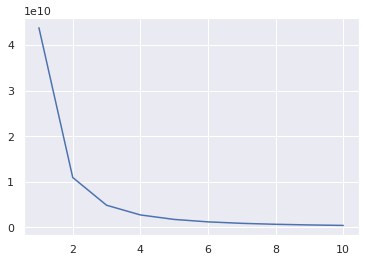

In [108]:
plt.plot(range(1,11),ss)

In [109]:
km1=KMeans(n_clusters=3)
X=km1.fit_transform(dftrain)

In [110]:
la_k=list()
la_k=km1.labels_

In [111]:
Y = km1.fit_predict(dftrain)

In [20]:
X=dftrain
X.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,3441,1,0,4,0,5,1,2,3,3,3
1,3292,0,1,18,1,2,15,0,2,3,0
2,6571,0,1,44,1,2,1,2,0,5,1
3,2469,1,1,44,1,7,0,1,1,5,1
4,3315,0,1,20,1,3,15,1,5,5,0


In [13]:
import matplotlib.pyplot as plt

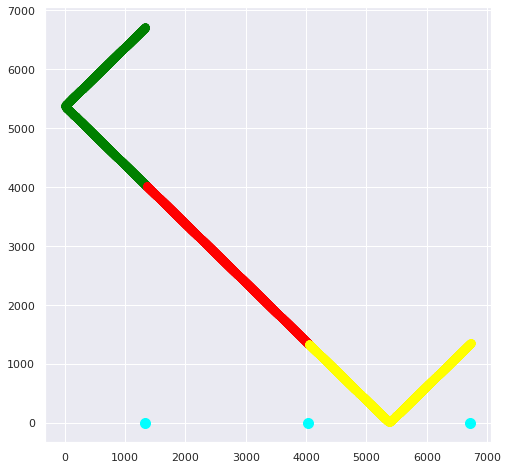

In [112]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

#uaing hiraichal algorithmic clustering

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

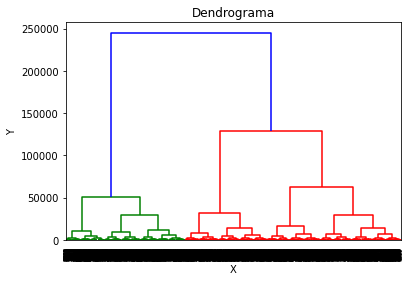

In [26]:
dendrograma = dendrogram(linkage(dftrain, method='ward'))
plt.title('Dendrograma')
plt.xlabel('X')
plt.ylabel('Y');

In [35]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
x1=dftrain
x11= hc.fit_predict(x1)  

In [61]:
la_h=hc.labels_

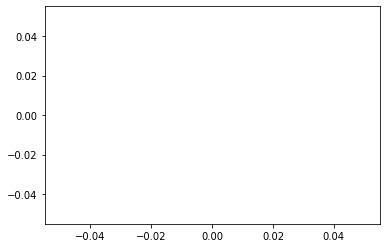

In [52]:
# x11.shape
plt.scatter(x11[y==0,0],x11[y==0,1], c = 'blue', label = 'Cluster 1')
plt.scatter(x11[y == 0, 0], x11[y == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x11[y== 1, 0], x11[y == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
plt.scatter(x11[y== 2, 0], x11[y == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
plt.scatter(x11[y == 3, 0], x11[y == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x11[y == 4, 0], x11[y == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


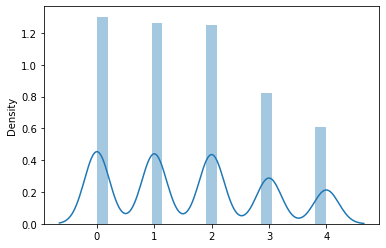

In [45]:
import seaborn as sns
sns.distplot(x11)

#using DBSCAN algorithm

In [53]:
from sklearn.cluster import DBSCAN

In [115]:
db=DBSCAN(eps=0.2,algorithm='ball_tree',min_samples=3)
db.fit(dftrain)

DBSCAN(algorithm='ball_tree', eps=0.2, min_samples=3)

In [116]:
x111=db.fit_predict(dftrain)

In [117]:
db_labels=db.labels_

In [118]:
db_labels

array([-1, -1, -1, ..., -1, -1, -1])

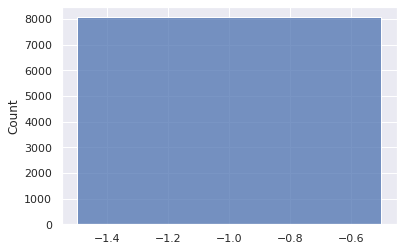

In [119]:
sns.histplot(db_labels)

for kmeans

In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y,la_k)

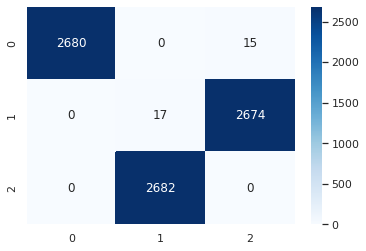

In [114]:
import seaborn as sns; 
sns.set()
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

for algorithmic clustering

In [62]:
cmh=confusion_matrix(x11,la_h)

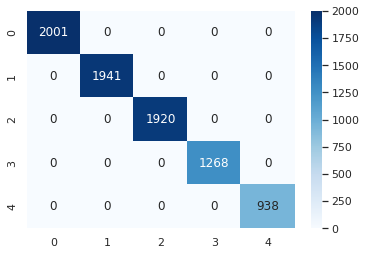

In [64]:
ax1=sns.heatmap(cmh,annot=True,fmt='d',cmap="Blues")

for DBSCAN clustering

In [95]:
cmd=confusion_matrix(x111,db_labels)

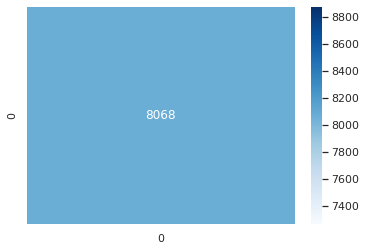

In [96]:
ax1=sns.heatmap(cmd,annot=True,fmt='d',cmap="Blues")

from the above graph we could clearly say that heraichal algorithmic approach would be best for this customer segment dataset 

Talking about other algorithms to use here DBSCAN was really expected to do more well but it didn't do so and also k mean was not so good with this dataset

the future algorithm would be using supervised clustering algorithms here and seening who would perform more correctly and accurately

#key findings

<list>
1. by using ball tree algorithm it is able to segregate the customers based on the different feature which was our objective<br>
2. for this segregation it has joined the features in a such form that only comman onces get grouped and chance of error get less


the basic flaw in this model could be : 
1. more number of null values,missing values which we countered but could be possible that they were mode or mean instead of median which could affect the model
2. less gap in datapoint could make the DBSCAN do poor performance in preidicting and fitting
3. to manny feature could lead to overfitting of hirarichal algorithmic clustering
